In [13]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from skimage import io

In [14]:
width = 128
height = 128

X_train   = np.ndarray(shape=(123, height*width), dtype=np.float64)
y_train = []
X_test   =  np.ndarray(shape=(123, height*width), dtype=np.float64)
y_test = []

In [15]:
directory = '/Users/boyaronur/Desktop/AR_DB/resized_sketch/' 
directory_dir  = os.listdir(directory)
directory_dir = sorted(directory_dir)
os.chdir(directory)
#print(directory)
#print(directory_dir)
for j in range(len(directory_dir)):
    img = io.imread(directory_dir[j], as_gray=True)
    X_train[j,:] = np.array(img, dtype='float64').flatten()
    y_train.append(directory_dir[j])

directory = '/Users/boyaronur/Desktop/AR_DB/resized_photos/' 
directory_dir  = os.listdir(directory)
directory_dir = sorted(directory_dir)
os.chdir(directory)
#print(directory)
#print(directory_dir)
for i in range(len(directory_dir)):
    img = io.imread(directory_dir[i], as_gray=True)
    X_test[i,:] = np.array(img, dtype='float64').flatten()
    y_test.append(directory_dir[i])
    
len(X_train)
X_train.shape

(123, 16384)

In [6]:
X_test.shape

(123, 16384)

In [16]:
X_train = X_train.reshape(123,128,128,1)
X_test = X_test.reshape(123,128,128,1)

In [17]:
y_train = np.arange(0,123,1)
y_test = np.arange(0,123,1)

In [7]:
#import pandas as pd
#y_train = pd.factorize(y_train)
#

In [8]:
y_train

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122])

In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
X_test.shape

(123, 128, 128, 1)

In [ ]:
X_train = np.concatenate(X_train, X_test[0:30])
y_train = np.concatenate(y_train, y_test[0:30])

X_test = X_test[30:123]
y_test = y_test[30:123]

In [20]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')

X_train = X_train.reshape(X_train.shape[0], 1, 128, 128)
X_test = X_test.reshape(X_test.shape[0], 1, 128, 128)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

shift = 0.2
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=123):
    print('hello')
    break
        
X_train_more = np.concatenate((X_train, X_batch), axis=0)
y_batch = np.arange(0,123,1)
y_batch = to_categorical(y_batch)
y_train_more = np.concatenate((y_train, y_batch), axis = 0)

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=123):
    print('hello')
    break

X_train_more = np.concatenate((X_train_more, X_batch), axis=0)
y_batch = np.arange(0,123,1)
y_batch = to_categorical(y_batch)
y_train_more = np.concatenate((y_train_more, y_batch), axis = 0)


datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=123):
    print('hello')
    break

X_train_more = np.concatenate((X_train_more, X_batch), axis=0)
y_batch = np.arange(0,123,1)
y_batch = to_categorical(y_batch)
y_train_more = np.concatenate((y_train_more, y_batch), axis = 0)


hello
hello
hello


In [21]:
y_train_more.shape

(492, 123)

In [22]:
X_train_more = X_train_more.reshape(492,128,128,1)
X_test = X_test.reshape(123,128,128,1)

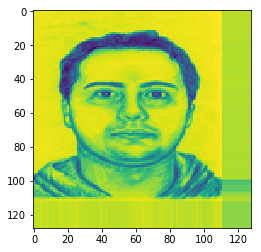

In [36]:
plt.imshow(X_batch[0].reshape(128,128))

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128,128,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(123, activation='softmax'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 492032)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 123)               60520059  
Total params: 60,539,163
Trainable params: 60,539,163
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])

In [12]:
model.fit(X_train_more, y_train_more, validation_data=(X_test, y_test), epochs=500)


Instructions for updating:
Use tf.cast instead.
Train on 492 samples, validate on 123 samples
Epoch 1/500
492/492 [==============================] - 52s 106ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 2/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 3/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 4/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 5/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 6/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 7/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.01

Epoch 59/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 60/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 61/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 62/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 63/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 64/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 65/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 66/500
492/492 [==========================

492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 120/500
492/492 [==============================] - 46s 93ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 121/500
492/492 [==============================] - 46s 93ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 122/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 123/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 124/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 125/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0102 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 126/500
492/492 [==============================] 

Epoch 179/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 180/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 181/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 182/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 183/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 184/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 185/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 186/500
492/492 [==================

Epoch 239/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 240/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 241/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 242/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 243/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 244/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 245/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0122 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 246/500
492/492 [==================

Epoch 299/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0142 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 300/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0142 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 301/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0142 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 302/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0142 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 303/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0142 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 304/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0142 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 305/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0142 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 306/500
492/492 [==================

Epoch 359/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 360/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 361/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 362/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 363/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 364/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 365/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 366/500
492/492 [==================

Epoch 419/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 420/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 421/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 422/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 423/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 424/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 425/500
492/492 [==============================] - 47s 96ms/step - loss: 0.0161 - acc: 0.0183 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 426/500
492/492 [==================

Epoch 479/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0203 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 480/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0203 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 481/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0203 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 482/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0203 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 483/500
492/492 [==============================] - 46s 94ms/step - loss: 0.0161 - acc: 0.0203 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 484/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0203 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 485/500
492/492 [==============================] - 47s 95ms/step - loss: 0.0161 - acc: 0.0203 - val_loss: 0.0160 - val_acc: 0.0163
Epoch 486/500
492/492 [==================

In [31]:
model.predict(X_test[:4])

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e